# VL10: Einfache Regression

### Set-Up

In [ ]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import numpy as np
import missingno as msno

# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Download latest version

path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

ds = pd.read_csv(f"{path}/credit_card_transactions.csv")

print(f"Anzahl Zeilen: {ds.shape[0]}")
print(f"Anzahl Spalten: {ds.shape[1]}")

Anzahl Zeilen: 1296675
Anzahl Spalten: 24


### Einfache Regressionen

Zuerst haben wir analog zur Vorlesung probiert, ein lineares Regressionsmodell (mit OLS) mit nur einem Feature zu trainieren vorherzusagen, ob eine Transaktion ein Betrug ist (is_fraud). Anschliessend haben wir die Performance ausgeben lassen sowie jeweils 3 Plots: 
* **Scatterplot:** Zeigt auf der X-Achse die Feature-Variable und auf der Y-Achse die zu vorhersagende Variable *is_fraud*, um die Korrelation zu sehen. Die Interpretation in unserem Fall ist allerdings stark eingeschränkt da unsere Target-Variable binär ist. Trotzdem möchten wir mit dem Plot sehen, ob beispielsweise erst Fraud-Fälle ab einem bestimmten Transaktionsbetrag oder ab einer bestimmten Uhrzeit auftreten.
* **Konfusionsmatrix:** Hier sehen wir von oben-links nach unten-links True-Negatives, False-Positives, True-Positives und False-Negatives. Wir haben diesen Plot integriert, da es sich aufgrund unserer Target-Variable um ein Klassifizierungsproblem handelt.
* **ROC-Kurve:** Zeigt uns, wie gut unser Klassifikationsmodell zwischen den beiden Klassen fraud/kein fraud untersdcheidet, abhängig vom Schwellenwert (der hier bei den standardmässigen 0.5 belassen wurde). Ebenso wird die AUC (Area Under Curve) angezeigt. Je höher diese ist, desto besser, denn diese zeigt die Gesamtgüte des Modells. Wäre sie 0.5, wäre unser Modell nicht besser als ein Münzwurf, bei 1.0 hätten wir das perfekte Modell.

-------------------------------------Time-------------------------------------

                            OLS Regression Results                            
Dep. Variable:               is_fraud   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     33.43
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           7.38e-09
Time:                        09:33:43   Log-Likelihood:             1.5040e+06
No. Observations:             1296675   AIC:                        -3.008e+06
Df Residuals:                 1296673   BIC:                        -3.008e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

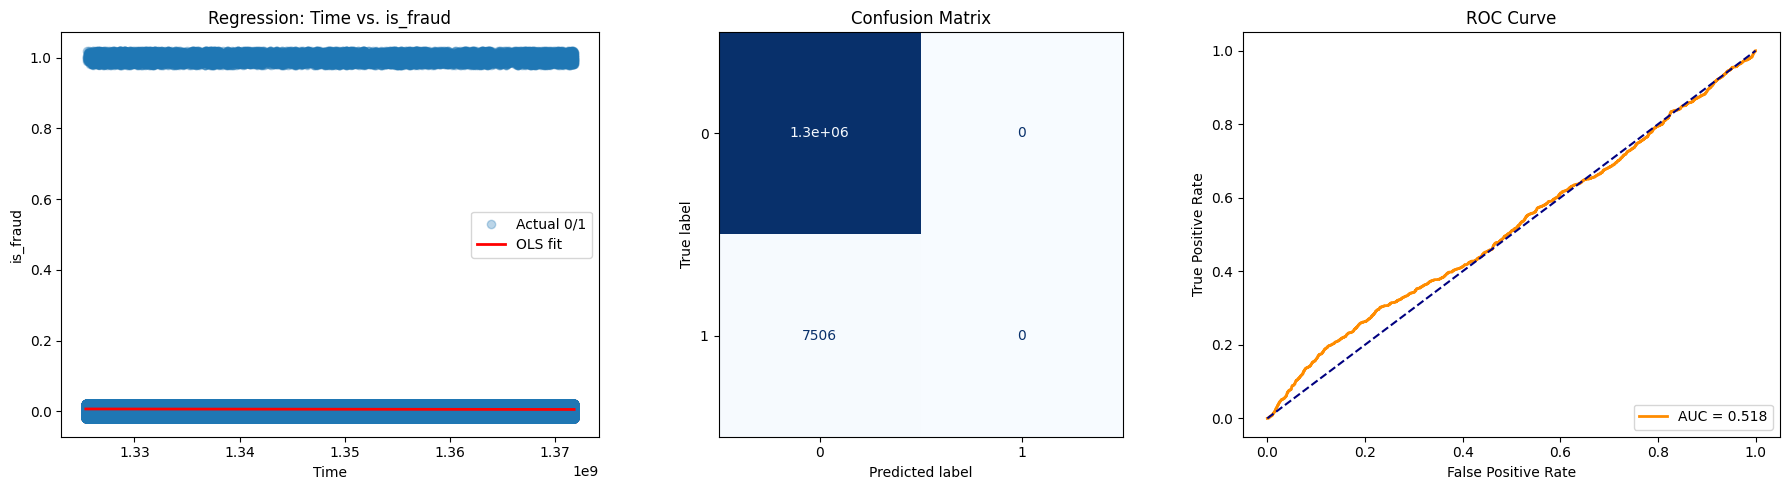

-------------------------------------Category Shopping_Net-------------------------------------

                            OLS Regression Results                            
Dep. Variable:               is_fraud   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2545.
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        09:33:48   Log-Likelihood:             1.5053e+06
No. Observations:             1296675   AIC:                        -3.011e+06
Df Residuals:                 1296673   BIC:                        -3.011e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

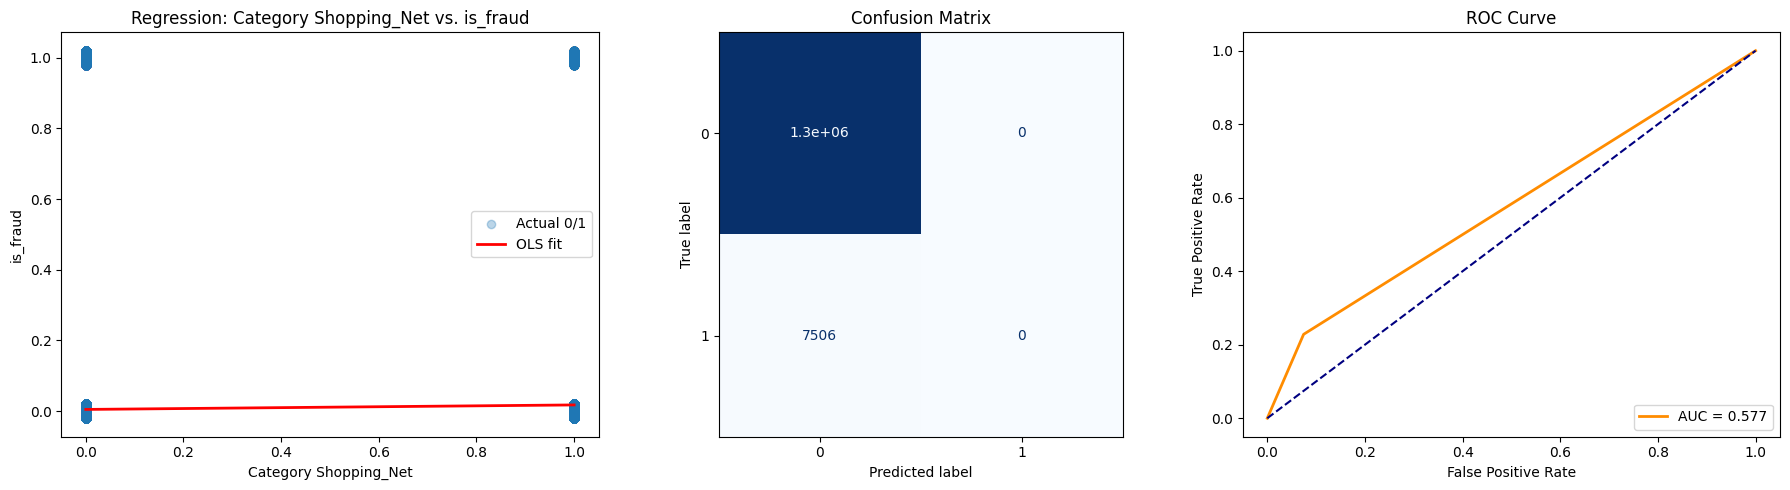

-------------------------------------Amount-------------------------------------

                            OLS Regression Results                            
Dep. Variable:               is_fraud   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                 6.558e+04
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        09:33:53   Log-Likelihood:             1.5360e+06
No. Observations:             1296675   AIC:                        -3.072e+06
Df Residuals:                 1296673   BIC:                        -3.072e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

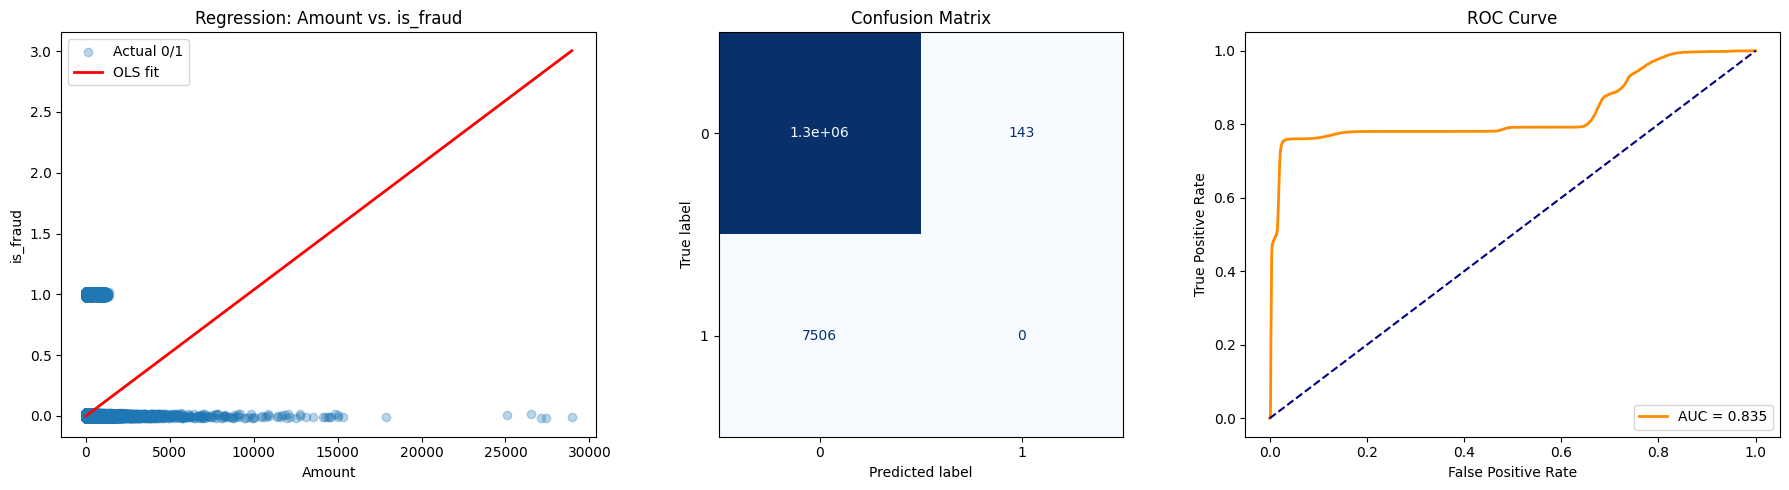

-------------------------------------Zipcode-------------------------------------

                            OLS Regression Results                            
Dep. Variable:               is_fraud   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.060
Date:                Wed, 03 Dec 2025   Prob (F-statistic):             0.0138
Time:                        09:33:56   Log-Likelihood:             1.5040e+06
No. Observations:             1296675   AIC:                        -3.008e+06
Df Residuals:                 1296673   BIC:                        -3.008e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

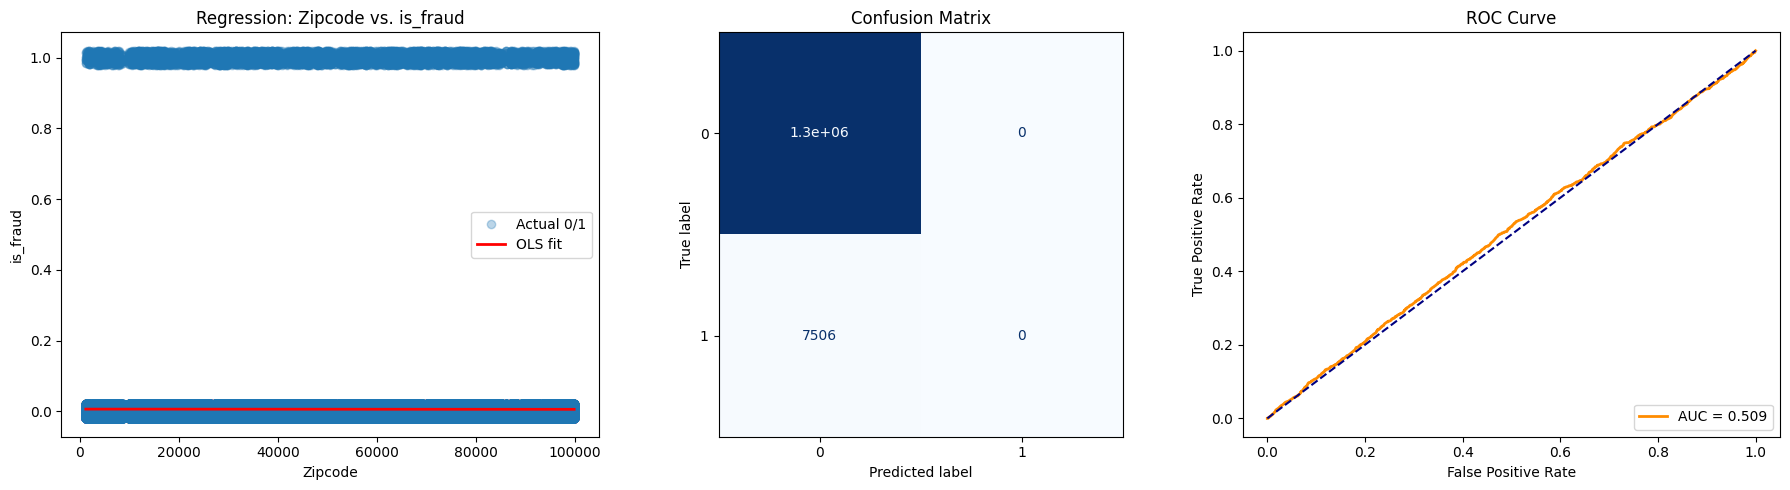

-------------------------------------Age-------------------------------------

                            OLS Regression Results                            
Dep. Variable:               is_fraud   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     199.1
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           3.26e-45
Time:                        09:34:01   Log-Likelihood:             1.5041e+06
No. Observations:             1296675   AIC:                        -3.008e+06
Df Residuals:                 1296673   BIC:                        -3.008e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

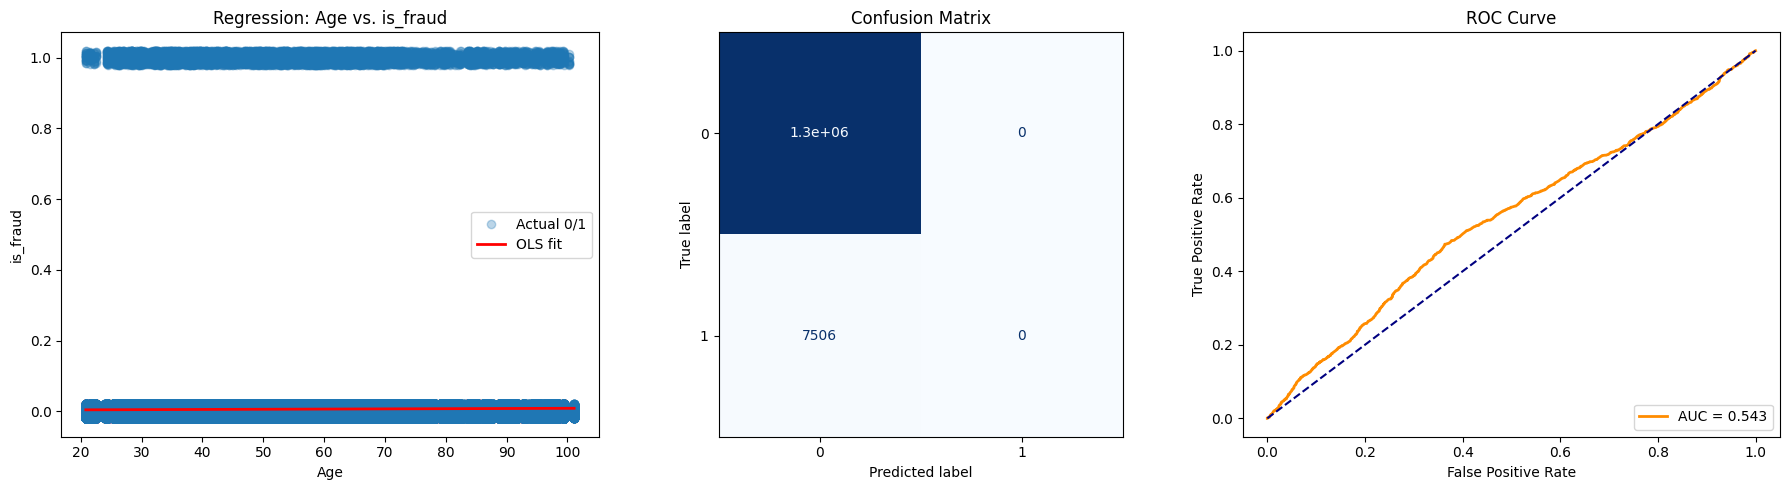

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Target-Variable
y = ds["is_fraud"]

# Alter basierend auf Geburtsdatum
ds["dob"] = pd.to_datetime(ds["dob"], errors="coerce")
today = pd.Timestamp("today")
ds["age"] = (today - ds["dob"]).dt.days / 365.25


# Dictionary mit allen einzeln zu testenden Feature-Variablen
X_features = {
    "Time": ds["unix_time"], 
    "Category Shopping_Net" : (ds["category"] == "shopping_net").astype(int), 
    "Amount" : ds["amt"], 
    "Zipcode" : ds["zip"], 
    "Age" : ds["age"]
}

for name, feature in X_features.items():
    # X definieren und mit Achsenabschnitt erweitern
    X = feature.to_frame()
    X = sm.add_constant(X)

    # Modell fitten
    model = sm.OLS(y, X).fit()
    print(37*"-" + name + 37*"-" + "\n")
    print(model.summary())

    # Daten für die Darstellung vorbereiten
    y_actual = y
    y_pred = model.predict(X)

    # Threshold standardmässig auf 0.5 gesetzt (da lineares Modell hier manuell)
    y_pred_class = (y_pred >= 0.5).astype(int)
    cm = confusion_matrix(y, y_pred_class)

    # ROC-Kurve
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    auc = roc_auc_score(y, y_pred)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Scatter + Regression
    axes[0].scatter(feature, y + np.random.uniform(-0.02, 0.02, len(y)), alpha=0.3, label="Actual 0/1")
    sorted_idx = np.argsort(feature)
    axes[0].plot(feature.iloc[sorted_idx], y_pred.iloc[sorted_idx], color='red', linewidth=2, label="OLS fit")
    axes[0].set_xlabel(name)
    axes[0].set_ylabel("is_fraud")
    axes[0].set_title(f"Regression: {name} vs. is_fraud")
    axes[0].legend()

    # Konfusions-Matrix
    disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
    disp.plot(ax=axes[1], cmap="Blues", colorbar=False)
    axes[1].set_title("Konfusions Matrix")

    # ROC Kurve
    axes[2].plot(fpr, tpr, label=f"AUC = {auc:.3f}", color="darkorange", linewidth=2)
    axes[2].plot([0,1],[0,1], color="navy", linestyle="--")  # Zufallslinie
    axes[2].set_xlabel("False Positive Rate")
    axes[2].set_ylabel("True Positive Rate")
    axes[2].set_title("ROC kurve")
    axes[2].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

Zusammengefasst kann nun festgehalten werden, dass alle Feature-Variablen ausser der Transaktionsbetrag (*amount*) quasi keinen nennenswerten Vorteil bringen verglichen zu reinem Münzenwerfen, denn ihre AUC ist zwischen 0.509 und 0.577. Was zudem auffällt ist das diese Modelle kein einziges Mal eine Transaktion als fraud gekenntzeichnet haben, sie sind also absolut nutzlos. 

Bei der Feature-Variable *amount* allerdings gab es einen etwas grösseren Erfolg. Wir sehen die AUC mit 0.835 ist bereits deutlich besser. Ebenso hat das Modell bereits 143 Transaktionen als Fraud gekenntzeichnet, obwohl wir noch kein Tuning des Thresholds vollzogen haben. Diese waren allerdings alle eigentlich kein Fraud, d.h. False-Positives.

### Detailliertere einfache Regression mit Feature-Variable *amount*

Im Anschluss haben wir uns aufgrund der Resultate oben dazu entschieden, das einfache Regressionsmodell mit *amount* als Feature-Variable nochmals genauer anzusehen. Dazu haben wir zuerst die Amount-Einträge Z-standardisiert, d.h. danach war ihr Mittelwert 0 und die Standardabweichung 1, wobei die Form der Verteilung gleich bleibt. Dies ist zwar bei einem Feature nicht wirklich relevant (da nicht unterschiedliche Skalen reinspielen ins Modell, es gibt nur ein Feature), es ist allerdings Standard vor einer linearen Regression, und später werden wir es ohnehin brauchen. Zudem haben wir die üblichsten Gütemasse berechnet und ausgegeben.

                            OLS Regression Results                            
Dep. Variable:               is_fraud   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                 6.558e+04
Date:                Mon, 08 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:56:20   Log-Likelihood:             1.5360e+06
No. Observations:             1296675   AIC:                        -3.072e+06
Df Residuals:                 1296673   BIC:                        -3.072e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058    6.5e-05     89.059      0.0

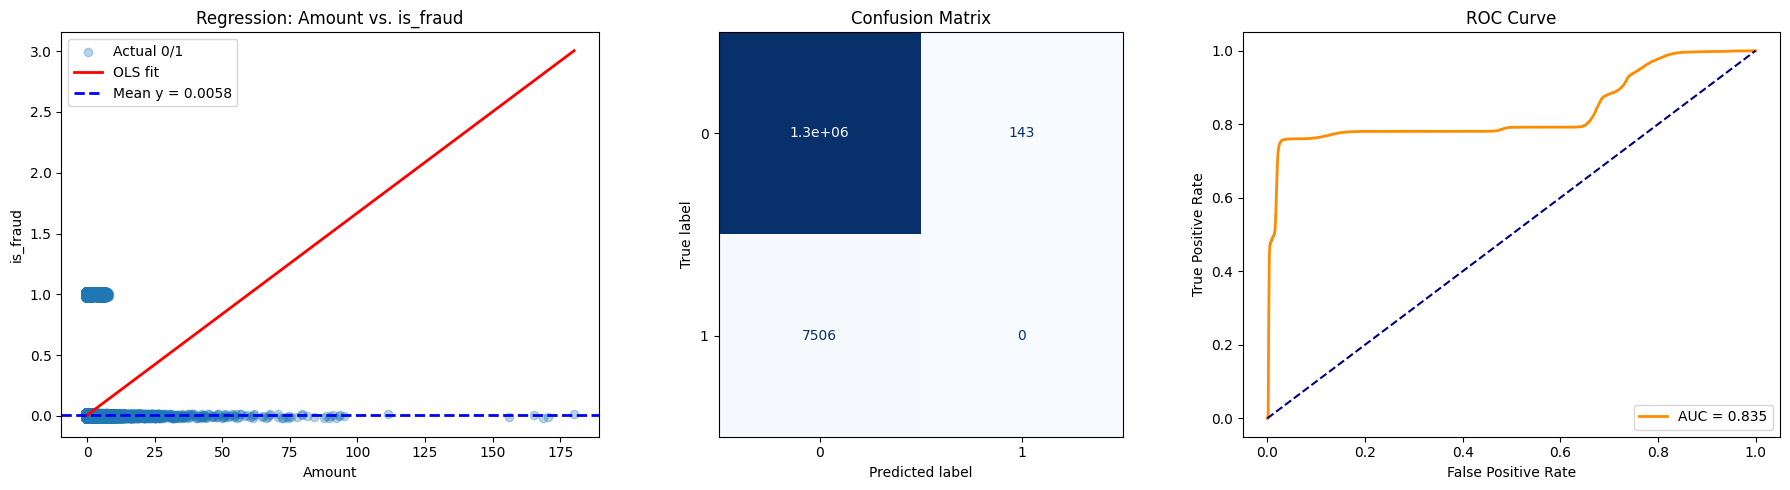

In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Target-Variable
y = ds["is_fraud"]

# Vorbereiten der Feature-Variable durch Z-Standardisieren und hinzufügen des Achsenabschnitts
scaler = StandardScaler()
amt_scaled = scaler.fit_transform(ds[["amt"]]).flatten()
X = pd.DataFrame({
    "Amount" : amt_scaled
})
X = sm.add_constant(X)

# Modell fitten
model = sm.OLS(y, X).fit()
print(model.summary())

# Daten für Plots vorbereiten
y_actual = y
y_pred = model.predict(X)

# Wichtigste Gütemasse berechnen
y_mean = np.mean(y)

# TSS
TSS = np.sum((y - y_mean)**2)

# RSS
RSS = np.sum((y - y_pred)**2)

# ESS
ESS = np.sum((y_pred - y_mean)**2)

print("=== Wichtigste Gütemasse ===")
print("Total Sum of Squares (TSS):", TSS)
print("Explained Sum of Squares (ESS):", ESS)
print("Residual Sum of Squares (RSS):", RSS)
print("Check: TSS ≈ ESS + RSS:", np.isclose(TSS, ESS + RSS))

# Threshold auf (standardmässige) 0.5 setzen
y_pred_class = (y_pred >= 0.5).astype(int)
cm = confusion_matrix(y, y_pred_class)

# ROC Kurve
fpr, tpr, thresholds = roc_curve(y, y_pred)
auc = roc_auc_score(y, y_pred)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter + Regression
axes[0].scatter(amt_scaled, y + np.random.uniform(-0.02, 0.02, len(y)), alpha=0.3, label="Actual 0/1")
sorted_idx = np.argsort(amt_scaled)
axes[0].plot(amt_scaled[sorted_idx], y_pred[sorted_idx], color='red', linewidth=2, label="OLS fit")
axes[0].set_xlabel("Amount")
axes[0].set_ylabel("is_fraud")

# Horizontale Linie für Mittelwert
axes[0].axhline(y=y_mean, color='blue', linestyle='--', linewidth=2, label=f"Mean y = {y_mean:.4f}")
axes[0].set_title(f"Regression: {"Amount"} vs. is_fraud")
axes[0].legend()

# Confusion Matrix
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot(ax=axes[1], cmap="Blues", colorbar=False)
axes[1].set_title("Confusion Matrix")

# ROC Curve
axes[2].plot(fpr, tpr, label=f"AUC = {auc:.3f}", color="darkorange", linewidth=2)
axes[2].plot([0,1],[0,1], color="navy", linestyle="--")  # Zufallslinie
axes[2].set_xlabel("False Positive Rate")
axes[2].set_ylabel("True Positive Rate")
axes[2].set_title("ROC Curve")
axes[2].legend(loc="lower right")

plt.tight_layout()
plt.show()

Hier nun unsere zusätzliche Interpretation der wichtigsten Werte:
* Koeffizient von Amount $= 0.0166:$ Eine Erhöhung des Betrags um 1 Standardabweichung (da z-Standardisiert) erhöht die Betrugswahrscheinlichkeit um ca. 1.66%. Mit $t=256$ ist der Einfluss statistisch extrem signifikant, was aber eher auf die sehr grosse Stichprobe, als von starker Erklärungskraft kommt, d.h. es ist zwar statistisch signifikant, jedoch praktisch nicht relevant, denn:
* $R^2 = ESS / RSS = 0.048:$ Zeigt den Anteil der vom Modell erklärten Streuung an der Gesamtstreuung von *is_fraud*. Unser Modell erklärt also nur ca. 5% der Varianz von *is_fraud*, der Betrag allein ist also ein schwacher Prädiktor und Betrug hängt stark von anderen Faktoren ab. 
* $RSS = 7103:$ Zeigt wie hoch die unerklärte Streuung ist

# Fazit

Mit unseren oben gezeigten linearen Modellen haben wir eigentlich ein eher ungeeignetes Verfahren für ein Klassifikationsproblem angewendet. Wir haben nämlich ein lineares Modell, welches auch Werte unter 0 und über 1 vorhersagen kann, auf eine Klassifikation bzw. eine Wahrscheinlichkeit für Fraud angewendet, welche normalerweise zwischen 0 und 1 zu verorten ist. Zudem sind die Annahmen von linearer Regression bezüglich der Residuen verletzt (Normalverteilung, Homoskedastizität), denn unsere Zielvariable ist binär. Zusätzlich ist die Klassifikation mit Threshold von 0.5 (d.h. wir klassifizieren eine Transaktion als Fraud wenn unser Lineares "Wahrscheinlichkeitsmodell" eine Wahrscheinlichkeit von $\geq 0.5$ voraussagt) praktisch nutzlos, denn unsere Klassen Fraud & kein Fraud sind stark unausgeglichen in unserem Datensatz, d.h. die allermeisten Beobachtungen sind kein Fraud. 

Zusammengefasst lässt sich festhalten, dass wir hier probiert haben, den Vorlesungsinhalt von einfachen, linearen Regressionen auf ein Problem anzuwenden, wofür es deutlich passendere Ansätze gibt. Dies war uns allerdings von Anfang an bewusst, wir wollten einfach testen, wie viel ein solch unpassendes Modell mit nur einem einzigen Feature bereits an Fraud erklären kann und wo die Limitationen klar werden. Im nächsten Notebook werden wir dann auf die Vorlesung 12 eingehen und weitere (logistische) Regressionen nutzen, um das Fraud-Modell passender und relevanter zu modellieren, inklusive weiterer Features und Custom Thresholds.